### **Colorado Graph Simulation**

This Jupyter notebook will demonstrate how to extract all nodes and edges from the Colorado county.csv dataset, along with visualizing toy models using networkx (nx).

In [28]:
# tested on python 3.11.2
import csv
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import re

### **Finding Nodes and Edges**

Prior to representing a graph, we will access all nodes and edges from our Colorado dataset. Each node represents a county in Colorado, and edges exist between any two contiguous counties in Colorado.

### **Finding Nodes**

The `find_nodes` function will select all distinct county names from the CSV.

In [19]:
"""
find_nodes function
Input:  Filepath (string) that leads to county.csv
Output: List containing all of Colorado's counties sorted in alphabetical order
"""
def find_nodes(input_path: str):
    
    """
    Use a hashset to track all of Colorado's counties w/out duplicates
    Hashsets have O(1) average lookup time.
    """
    seen = set()
    
    with open(input_path, "r") as input_file:
        
        # skip the header
        # if you don't do this, then you'll insert "County" as a node
        next(input_file, None)
        
        for line in input_file:
            try:
                
                """
                For each row, add each county (that's first listed) into
                the hashset. Since each pair [a, b] has a pair [b, a] in
                the CSV, we don't need to add both column values for each row.
                """
                row = line.split(",")
                seen.add(row[0])                
            
            # if something broke, print what went wrong
            except Exception as e:
                print(str(e))
    
    """
    Return a list in sorted order.
    Nodes and counties will be considered the same thing.
    """
    nodes = list(seen)
    nodes.sort()
    
    # O(nlogn) time for sorting counties, where n = number of counties
    # O(n) extra space for hashset and list
    return nodes

# run the function
# make sure that county.csv is in the SAME folder as this notebook!
input_path = "county.csv"
nodes = find_nodes(input_path)

Check if Colorado has 64 counties. If it doesn't, something went wrong!<br>
Source: https://dola.colorado.gov/lgis/counties.jsf


In [20]:
len(nodes)

64

Check to see if the counties are in sorted order.

In [22]:
nodes[:10]

['Adams',
 'Alamosa',
 'Arapahoe',
 'Archuleta',
 'Baca',
 'Bent',
 'Boulder',
 'Broomfield',
 'Chaffee',
 'Cheyenne']

### **Assigning Numbers to County Names**

Now that we've found all of Colorado's counties, let's assign key-value pairs.

- Key: County name
- Value: Position in alphabetically sorted list

In [37]:
# create a hashmap to assign counties to numbers
nums = dict()

# assign a number to each node
k = 0
for county_name in nodes:
    nums[county_name] = k
    k += 1

### **Finding Edges**

The `find_edges` function will generate an adjacency list of the edges in the graph, where edges represent contiguity.

In [38]:
"""
find_edges function
Input:  Filepath (string) that leads to county.csv
Output: Adjacency list containing all of Colorado's edges (as hashmap/dict)
"""
def find_edges(input_path: str):
    
    """
    Create an adjacency list, represented as a hashmap/dict
    Key:   County name (type: string)
    Value: List of county names (type: List[str])
    """
    adj_list = dict()
    
    with open(input_path, "r") as input_file:
        
        # skip the header
        next(input_file, None)
        
        for line in input_file:
            try:
                
                """
                For each row, we can get values [a, b]. Add a as a key if it
                doesn't already exist. Then, add b to the adjacency list.
                """
                line = re.sub('[\n]', '', line)
                a, b = line.split(",")
                if a not in adj_list:
                    adj_list[a] = []
                adj_list[a].append(b)               
            
            # if something broke, print what went wrong
            except Exception as e:
                print(str(e))
    
    # return the adjancency list
    # O(n) time for traversing CSV, where n = number of counties
    # O(n) extra space for adjacency list
    return adj_list

# run the function
# make sure that county.csv is in the SAME folder as this notebook!
input_path = "county.csv"
adj_list = find_edges(input_path)

Let's verify if the adjacency list looks good. Here, we'll display all of El Paso County's neighboring counties.

In [39]:
adj_list["El Paso"]

['Crowley', 'Douglas', 'Elbert', 'Fremont', 'Lincoln', 'Pueblo', 'Teller']

### **Extracting Edges**

Now that we have the adjacency list of the graph, let's extract all edges from the graph.

In [41]:
# store all the edges in a list
# stores (int, int) tuples
edges = []
for key in adj_list:
    
    # find the target county
    a = nums[key]
    
    # create an edge for every one of its neighbors
    for neighbor in adj_list[key]:
        b = nums[neighbor]
        edges.append((a, b))

Let's check how the edges look.

In [42]:
edges[-5:]

[(0, 2),
 (0, 7),
 (0, 16),
 (0, 30),
 (0, 44),
 (0, 61),
 (0, 62),
 (1, 11),
 (1, 12),
 (1, 28),
 (1, 53),
 (1, 55),
 (2, 0),
 (2, 16),
 (2, 18),
 (2, 21),
 (2, 30),
 (2, 37),
 (2, 61),
 (3, 11),
 (3, 27),
 (3, 33),
 (3, 40),
 (3, 53),
 (4, 5),
 (4, 36),
 (4, 50),
 (5, 4),
 (5, 31),
 (5, 36),
 (5, 45),
 (5, 50),
 (6, 7),
 (6, 24),
 (6, 25),
 (6, 30),
 (6, 35),
 (6, 62),
 (7, 0),
 (7, 6),
 (7, 30),
 (7, 62),
 (8, 22),
 (8, 26),
 (8, 34),
 (8, 47),
 (8, 49),
 (8, 55),
 (9, 31),
 (9, 32),
 (9, 37),
 (10, 24),
 (10, 25),
 (10, 30),
 (10, 47),
 (10, 59),
 (11, 1),
 (11, 3),
 (11, 12),
 (11, 53),
 (12, 1),
 (12, 11),
 (12, 28),
 (12, 36),
 (13, 20),
 (13, 31),
 (13, 37),
 (13, 45),
 (13, 51),
 (14, 22),
 (14, 28),
 (14, 51),
 (14, 55),
 (15, 26),
 (15, 39),
 (15, 43),
 (16, 0),
 (16, 2),
 (16, 30),
 (17, 33),
 (17, 42),
 (17, 56),
 (17, 57),
 (18, 2),
 (18, 21),
 (18, 20),
 (18, 30),
 (18, 60),
 (19, 23),
 (19, 25),
 (19, 34),
 (19, 49),
 (19, 54),
 (19, 59),
 (21, 2),
 (21, 18),
 (21, 20),

### **Creating the Graph**

In [32]:
# Create a graph with 15 nodes and no edges
graph = nx.Graph()
graph.add_nodes_from(range(1,16))

# Manually add edges to the graph
edges_to_add = [(1, 2), (1, 3), (3, 4), (2, 4), (2, 5), (4, 5), (4, 6), (3, 6), (5, 12), (5, 13),  # Example edges
                (5, 7), (6, 7), (6, 8),(7,9), (8, 9),(9,10),(7,11), (7,12),
                (10, 11), (11, 12), (12, 13), (13, 14),(13,15),(11,15)
                ]  # Connecting the subgraphs

graph.add_edges_from(edges_to_add)


In [33]:
# Partition the graph into three subgraphs
subgraph1_nodes = list(range(1, 6))
subgraph2_nodes = list(range(6, 11))
subgraph3_nodes = list(range(11, 16))

subgraph1 = graph.subgraph(subgraph1_nodes)
subgraph2 = graph.subgraph(subgraph2_nodes)
subgraph3 = graph.subgraph(subgraph3_nodes)

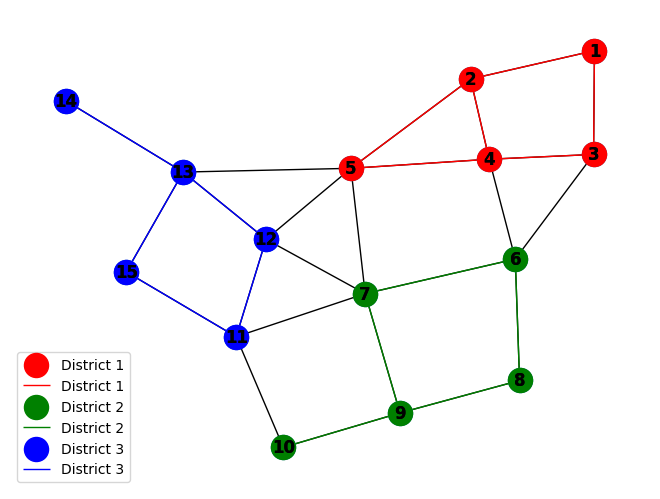

In [34]:
pos = nx.spring_layout(graph)  # You can change the layout algorithm as needed

nx.draw(graph, pos, with_labels=True, font_weight='bold')

nx.draw(subgraph1, pos, with_labels=True, font_weight='bold', node_color='r', edge_color='r', label='District 1')
nx.draw(subgraph2, pos, with_labels=True, font_weight='bold', node_color='g', edge_color='g', label='District 2')
nx.draw(subgraph3, pos, with_labels=True, font_weight='bold', node_color='b', edge_color='b', label='District 3')


plt.legend()
plt.show()

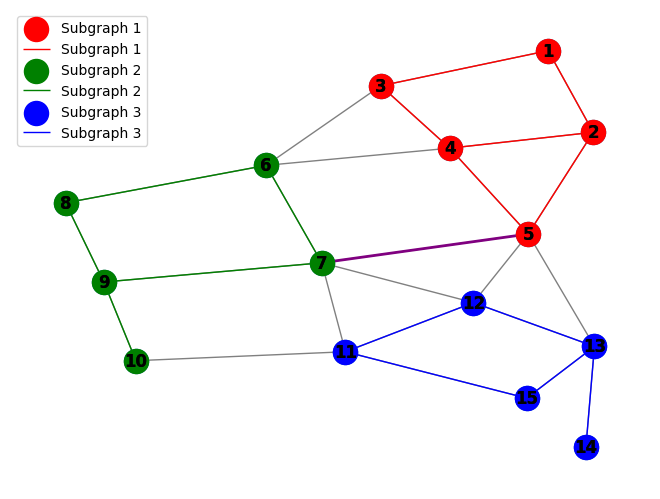

In [35]:
# Highlight an edge between subgraphs
highlighted_edge = (5, 7)

# Visualize the entire graph with the highlighted edge
pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels=True, font_weight='bold', edge_color='gray')

nx.draw(subgraph1, pos, with_labels=True, font_weight='bold', node_color='r', edge_color='r', label='Subgraph 1')
nx.draw(subgraph2, pos, with_labels=True, font_weight='bold', node_color='g', edge_color='g', label='Subgraph 2')
nx.draw(subgraph3, pos, with_labels=True, font_weight='bold', node_color='b', edge_color='b', label='Subgraph 3')

# Highlight the specific edge
nx.draw_networkx_edges(graph, pos, edgelist=[highlighted_edge], edge_color='purple', width=2)

plt.legend()
plt.show()

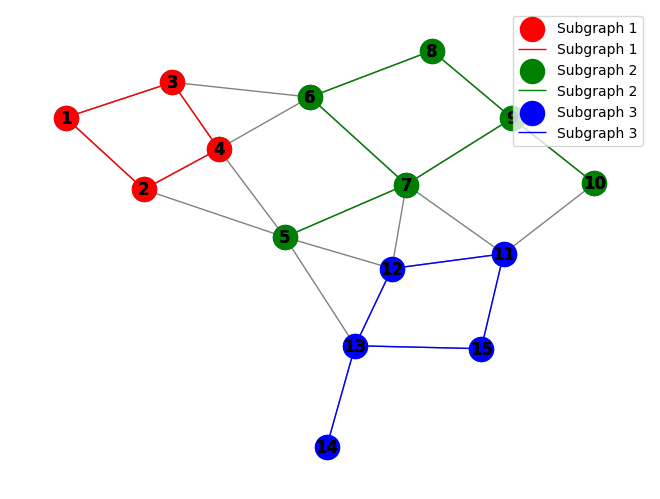

In [36]:
# Switch node 5 to subgraph2
subgraph2_nodes.append(5)
subgraph1_nodes.remove(5)

# Update subgraphs
subgraph1 = graph.subgraph(subgraph1_nodes)
subgraph2 = graph.subgraph(subgraph2_nodes)

# Visualize the updated graph
pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels=True, font_weight='bold', edge_color='gray')

nx.draw(subgraph1, pos, with_labels=True, font_weight='bold', node_color='r', edge_color='r', label='Subgraph 1')
nx.draw(subgraph2, pos, with_labels=True, font_weight='bold', node_color='g', edge_color='g', label='Subgraph 2')
nx.draw(subgraph3, pos, with_labels=True, font_weight='bold', node_color='b', edge_color='b', label='Subgraph 3')

plt.legend()
plt.show()